# Navigation Task with Multiple Targets

In [1]:
import torch
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from model.kohonen_som import KohonenSOM
from model.manager_som_position import ManagerSOMPosition, ManagerSOMPositionAllNeighbor
from custom_env.navigation_task import NavigationTaskMultiTarget
%matplotlib inline

path exception


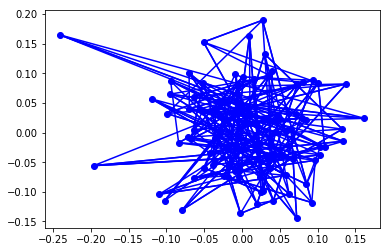

/Users/johnlime/Documents/MultipleApps/h_som/model/kohonen_som.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


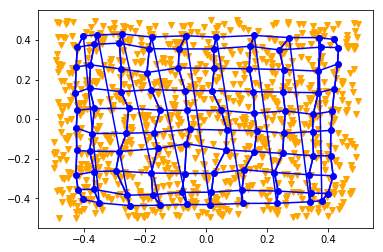

tensor([[-0.4036, -0.4057],
        [-0.4192, -0.3562],
        [-0.4265, -0.2821],
        [-0.4235, -0.1588],
        [-0.4251, -0.0448],
        [-0.4220,  0.0447],
        [-0.4288,  0.1313],
        [-0.4257,  0.2633],
        [-0.4217,  0.3633],
        [-0.4020,  0.4215],
        [-0.3497, -0.4235],
        [-0.3685, -0.3548],
        [-0.3659, -0.2660],
        [-0.3815, -0.1621],
        [-0.3737, -0.0731],
        [-0.3657,  0.0536],
        [-0.3818,  0.1569],
        [-0.3786,  0.2745],
        [-0.3657,  0.3778],
        [-0.3559,  0.4247],
        [-0.2497, -0.4374],
        [-0.2587, -0.3848],
        [-0.2955, -0.2619],
        [-0.2835, -0.1641],
        [-0.2605, -0.0716],
        [-0.2538,  0.0537],
        [-0.2787,  0.1387],
        [-0.2774,  0.2530],
        [-0.2841,  0.3843],
        [-0.2765,  0.4306],
        [-0.1503, -0.4358],
        [-0.1745, -0.3815],
        [-0.1796, -0.2729],
        [-0.1585, -0.1484],
        [-0.1703, -0.0678],
        [-0.1502,  0

In [2]:
x = torch.rand(1000, 2)-0.5
maxitr = 10**4*5
som = KohonenSOM(total_nodes=100, node_size=2, update_iterations=maxitr)
reshaped = som.w.reshape(10, 10, 2)
for v in range(10):
    plt.plot(reshaped[:, v, 0].numpy(), reshaped[:, v, 1].numpy(), marker='None', linestyle='-', color='blue')
    plt.plot(reshaped[v, :, 0].numpy(), reshaped[v, :, 1].numpy(), marker='None', linestyle='-', color='blue')
plt.plot(som.w[:, 0].numpy(), som.w[:, 1].numpy(), marker='o', color='blue')
plt.show()
for t in range(maxitr):
    a, c = som.update(x, t, 0)
    
plt.plot(x[:, 0].numpy(), x[:, 1].numpy(), marker='v', linestyle='None', color='orange')
reshaped = som.w.reshape(10, 10, 2)
for v in range(10):
    plt.plot(reshaped[:, v, 0].numpy(), reshaped[:, v, 1].numpy(), marker='None', linestyle='-', color='blue')
    plt.plot(reshaped[v, :, 0].numpy(), reshaped[v, :, 1].numpy(), marker='None', linestyle='-', color='blue')
plt.plot(som.w[:, 0].numpy(), som.w[:, 1].numpy(), marker='o', color='blue')
plt.show()
som.w

## Manager Self Organizing Map

/Users/johnlime/Documents/MultipleApps/h_som/model/kohonen_som.py:20: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)
/Users/johnlime/Documents/MultipleApps/h_som/model/manager_som_position.py:33: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x = torch.tensor(x)


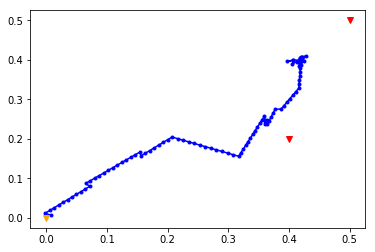

[True, False]
99 25.51924826704407


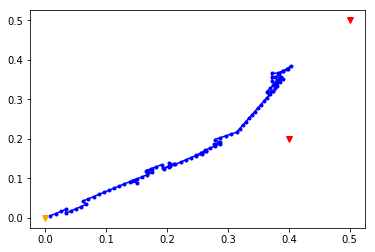

[True, False]
199 27.31211848384695


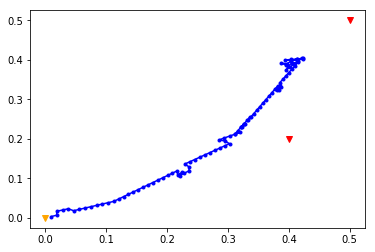

[True, False]
299 28.294537968516618


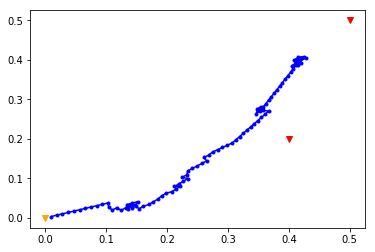

[True, False]
399 27.453445280830376


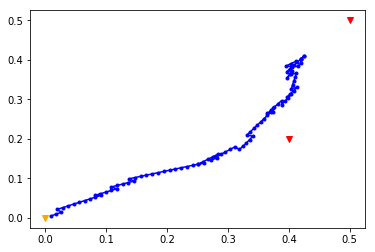

[True, False]
499 28.27716084089044


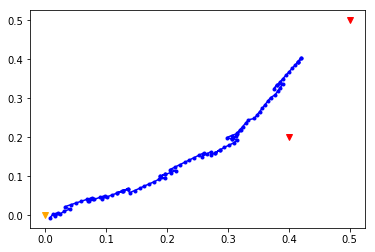

[True, False]
599 24.150504219348218


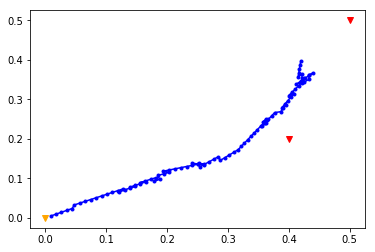

[True, False]
699 29.05546833964936


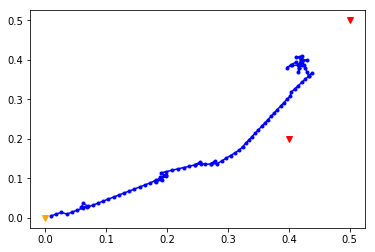

[True, False]
799 27.765908228196878


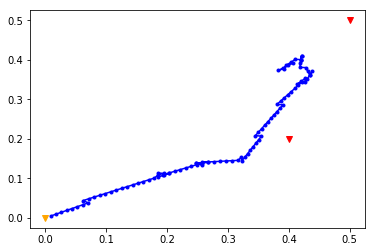

[True, False]
899 29.50147894480097


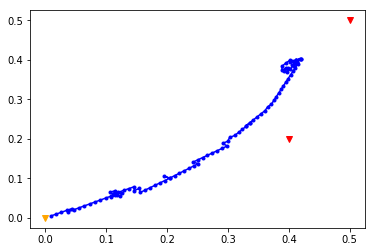

[True, False]
999 27.38931093024014


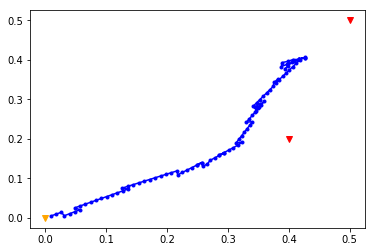

[True, False]
1099 28.219511357243274


In [ ]:
manager_maxitr = 10 ** 4
maxtime = 100
epsilon = 0.2
torch.manual_seed(0)
random.seed(0)

manager_som = ManagerSOMPosition(total_nodes=100, state_som = som, worker_som=som, update_iterations=manager_maxitr)
task = NavigationTaskMultiTarget()

for epoch in range(manager_maxitr):
    # for visualization
    total_return = 0
    state_trajectory = []
    obs = task.state()
    
    for t in range(maxtime):
        obs = task.state()
        
        # epsilon greedy
        if random.random() > epsilon:
            action_index = manager_som.get_action(som.location[som.select_winner(obs)]) # deterministic

        else:
            action_index = random.randrange(som.total_nodes)
        
        # step forward
        reward, next_obs = task.step(som.w[action_index])
        
        # online training
        manager_som.action_q_learning(
            current_state_position = som.location[som.select_winner(obs)],
            next_state_position = som.location[som.select_winner(next_obs)],
            action_index = action_index,
            reward = reward,
            t = epoch)
        
        obs = next_obs
        state_trajectory.append(np.array(obs))
        total_return += (0.9 ** t) * reward
        
    if epoch % 100 == 99:
        plt.plot(np.array(state_trajectory)[:, 0], np.array(state_trajectory)[:, 1], marker='.', linestyle='-', color='blue')
        plt.plot(0.0, 0.0, marker='v', linestyle='None', color='orange')
        
        for i in range(task.all_goals.shape[0]):
            plt.plot(np.array(task.all_goals[i])[0], np.array(task.all_goals[i])[1], marker='v', linestyle='None', color='red')
        
        plt.show()
        print(task.goal_completed)
        print(epoch, total_return)
    
    task.reset()

In [ ]:
# for visualization
total_return = 0
state_trajectory = []

for t in range(maxtime): 
    obs = task.state()
    action_index = manager_som.get_action(som.location[som.select_winner(obs)]) # deterministic

    # step forward
    reward, next_obs = task.step(som.w[action_index])

    obs = next_obs
    state_trajectory.append(np.array(obs))
    total_return += (0.9 ** t) * reward

plt.plot(np.array(state_trajectory)[:, 0], np.array(state_trajectory)[:, 1], marker='.', linestyle='-', color='blue')
plt.plot(0.0, 0.0, marker='v', linestyle='None', color='orange')

for i in range(task.all_goals.shape[0]):
    plt.plot(np.array(task.all_goals[i])[0], np.array(task.all_goals[i])[1], marker='v', linestyle='None', color='red')
        
plt.show()
print(task.goal_completed)
print(total_return)

task.reset()

In [ ]:
manager_maxitr = 10 ** 4
maxtime = 100
epsilon = 0.2
torch.manual_seed(0)
random.seed(0)

manager_som = ManagerSOMPositionAllNeighbor(total_nodes=100, state_som = som, worker_som=som, update_iterations=manager_maxitr)
task = NavigationTaskMultiTarget()

for epoch in range(manager_maxitr):
    # for visualization
    total_return = 0
    state_trajectory = []
    obs = task.state()
    
    for t in range(maxtime):
        obs = task.state()
        
        # epsilon greedy
        if random.random() > epsilon:
            action_index = manager_som.get_action(som.location[som.select_winner(obs)]) # deterministic

        else:
            action_index = random.randrange(som.total_nodes)
        
        # step forward
        reward, next_obs = task.step(som.w[action_index])
        
        # online training
        manager_som.action_q_learning(
            current_state_position = som.location[som.select_winner(obs)],
            next_state_position = som.location[som.select_winner(next_obs)],
            action_index = action_index,
            reward = reward,
            t = epoch)
        
        obs = next_obs
        state_trajectory.append(np.array(obs))
        total_return += (0.9 ** t) * reward
        
    if epoch % 100 == 99:
        plt.plot(np.array(state_trajectory)[:, 0], np.array(state_trajectory)[:, 1], marker='.', linestyle='-', color='blue')
        plt.plot(0.0, 0.0, marker='v', linestyle='None', color='orange')
        
        for i in range(task.all_goals.shape[0]):
            plt.plot(np.array(task.all_goals[i])[0], np.array(task.all_goals[i])[1], marker='v', linestyle='None', color='red')
        
        plt.show()
        print(task.goal_completed)
        print(epoch, total_return)
    
    task.reset()

In [ ]:
# for visualization
total_return = 0
state_trajectory = []

for t in range(maxtime): 
    obs = task.state()
    action_index = manager_som.get_action(som.location[som.select_winner(obs)]) # deterministic

    # step forward
    reward, next_obs = task.step(som.w[action_index])

    obs = next_obs
    state_trajectory.append(np.array(obs))
    total_return += (0.9 ** t) * reward

plt.plot(np.array(state_trajectory)[:, 0], np.array(state_trajectory)[:, 1], marker='.', linestyle='-', color='blue')
plt.plot(0.0, 0.0, marker='v', linestyle='None', color='orange')

for i in range(task.all_goals.shape[0]):
    plt.plot(np.array(task.all_goals[i])[0], np.array(task.all_goals[i])[1], marker='v', linestyle='None', color='red')
        
plt.show()
print(task.goal_completed)
print(total_return)

task.reset()